In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import rasterio
import shapely
from shapely.geometry import box, Polygon, Point
import os
import pyproj
import matplotlib.pyplot as plt

In [2]:
one = Point(-121.9116889874272, 37.29841837310324)
two = Point(-121.88928894561148, 37.29565299337677)
three = Point(-121.8355523851204, 37.32019187388171)

In [3]:
fp = '/oak/stanford/groups/deho/building_compliance/san_jose_naip_512/'

In [2]:
def plot_sample(lr, sr):
    plt.figure(figsize=(20, 10))

    images = [lr, sr]
#     titles = ['LR', f'SR (x{sr.shape[0] // lr.shape[0]})']

    for i, img in enumerate(images):
        plt.subplot(1, 2, i+1)
        plt.imshow(img)
#         plt.title(title)
        plt.xticks([])
        plt.yticks([])
        
    plt.show()

In [4]:
def find_display_npy(i):
    data_type = None
    if os.path.exists(os.path.join(fp, 'train', 'images', i.replace('.tif', '.npy'))):
        data_type = 'train'
    elif os.path.exists(os.path.join(fp, 'val', 'images', i.replace('.tif', '.npy'))):
        data_type = 'val'
    elif os.path.exists(os.path.join(fp, 'test', 'images', i.replace('.tif', '.npy'))):
        data_type = 'test'
    print(data_type)
    im = np.load(os.path.join(fp, data_type, 'images', i.replace('.tif', '.npy')))
    mask = np.load(os.path.join(fp, data_type, 'masks', i.replace('.tif', '_mask.npy')))
    plot_sample(im[:, :, :3], mask)
#     plt.show()

100
200
300
400
500
three: m_3712142_nw_10_060_20200525_412.tif
train


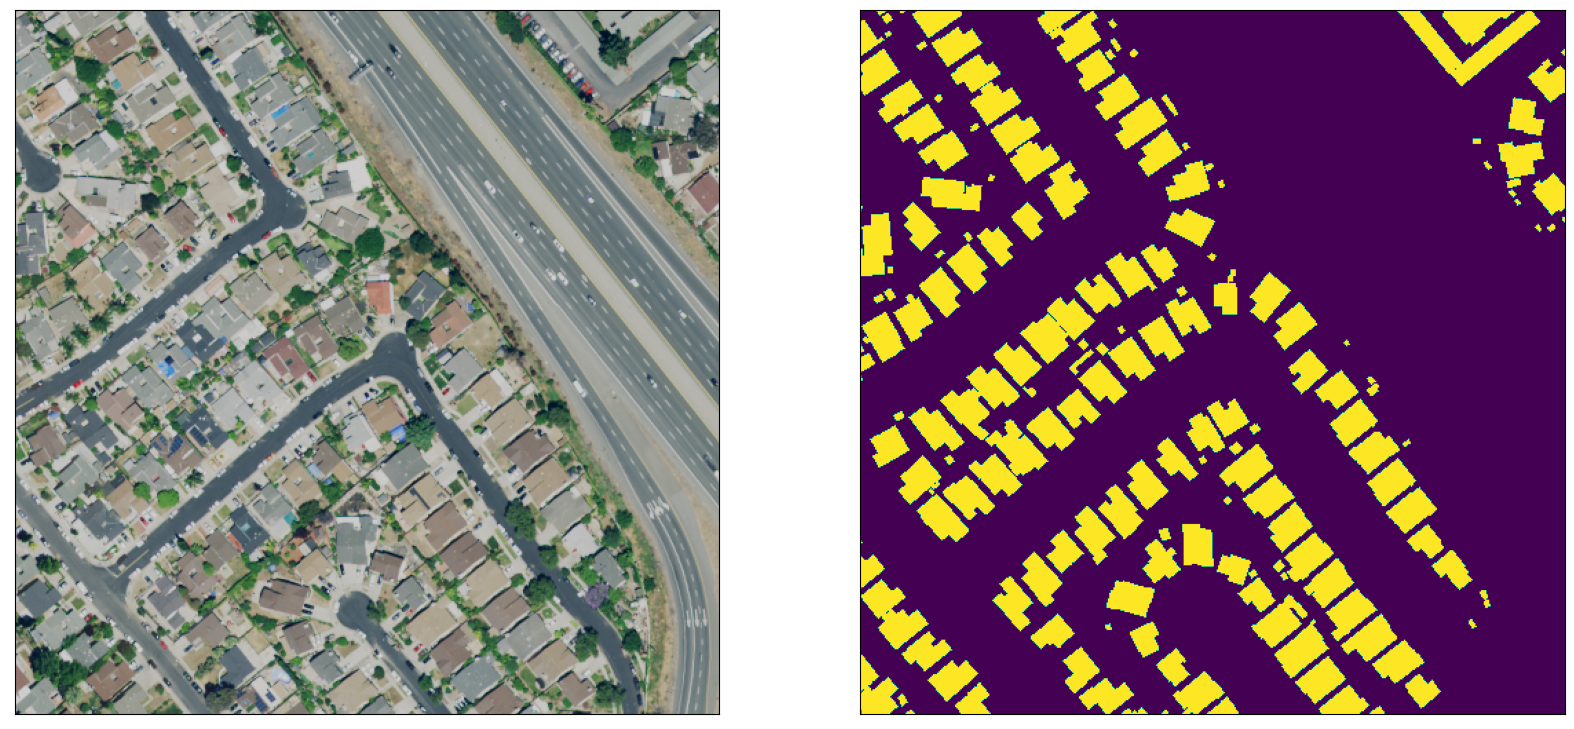

600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
two: m_3712141_se_10_060_20200525_134.tif
train


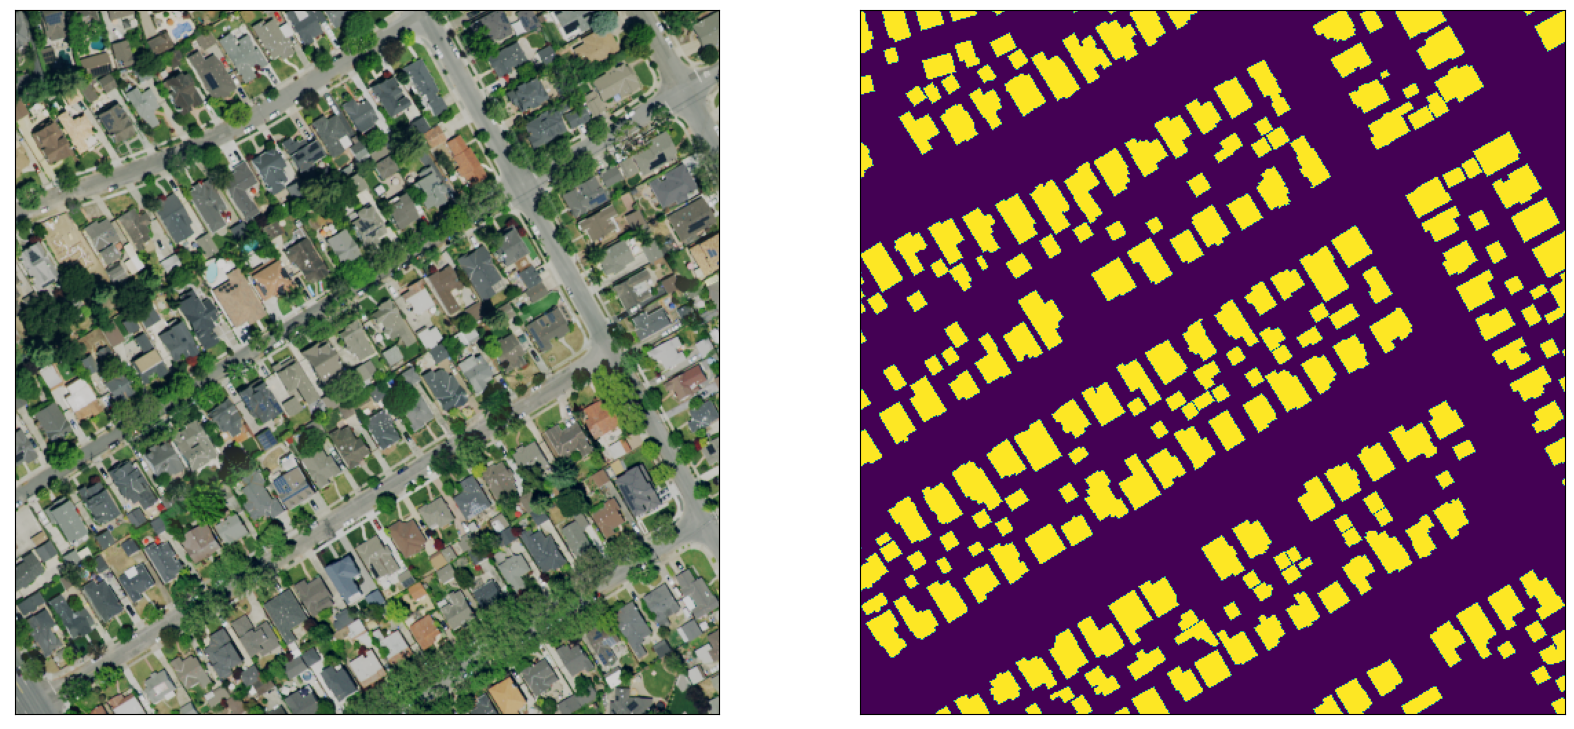

3300
one: m_3712141_se_10_060_20200525_108.tif
train


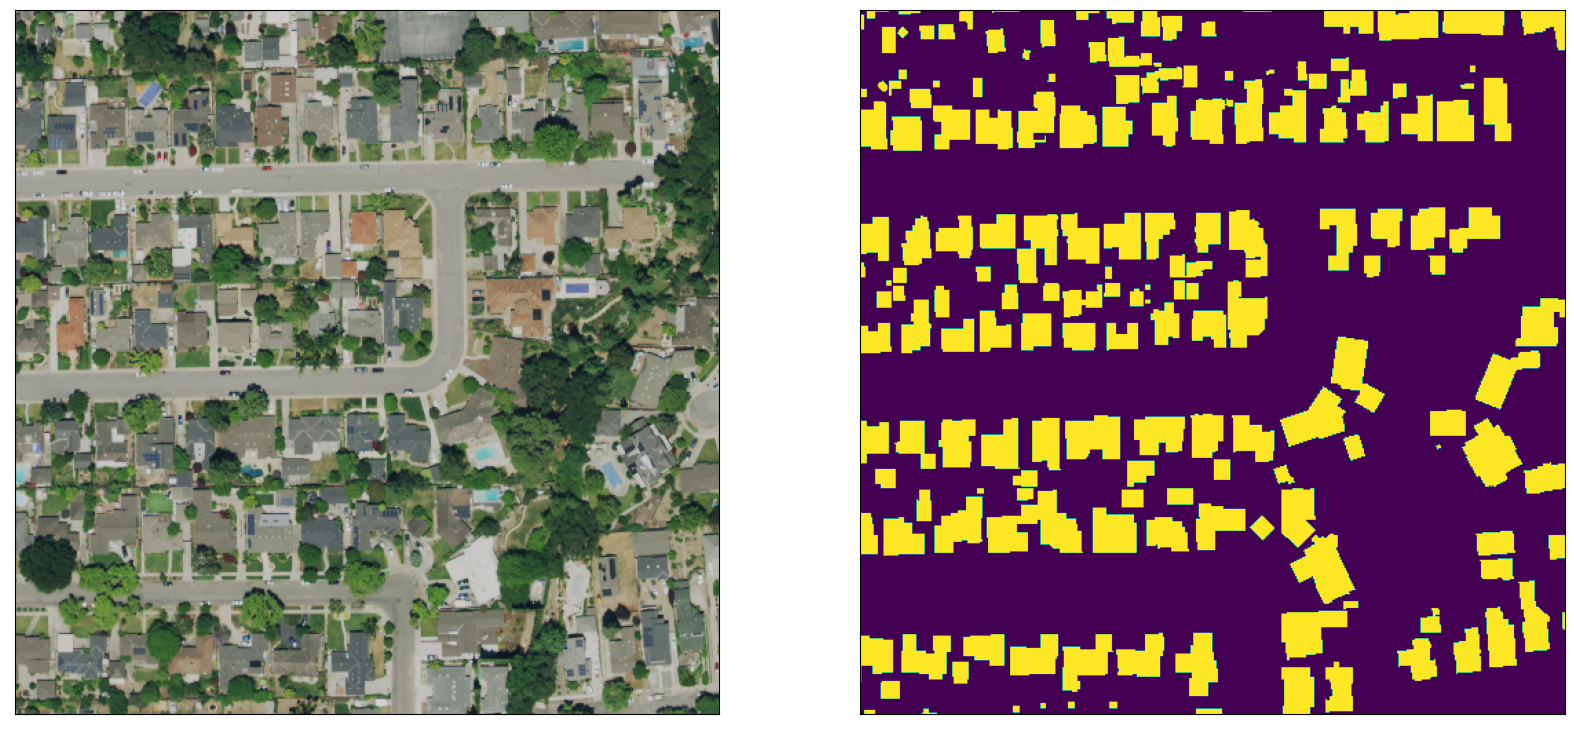

3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700


In [55]:
count = 0
for i in os.listdir(os.path.join(fp, 'raw_tif')):
    with rasterio.open(os.path.join(fp, 'raw_tif', i)) as inds:
        bounds = inds.bounds
        geom = box(*bounds)
        wgs84 = pyproj.CRS('EPSG:26910')
        utm = pyproj.CRS('EPSG:4326')

        project = pyproj.Transformer.from_crs(wgs84, utm, always_xy=True).transform
        utm_point = shapely.ops.transform(project, geom)
        
        if utm_point.contains(one):
            print(f'one: {i}')
            find_display_npy(i)
        if utm_point.contains(two):
            print(f'two: {i}')
            find_display_npy(i)
        if utm_point.contains(three):
            print(f'three: {i}')
            find_display_npy(i)
        
    count += 1
    if count % 100 == 0:
        print(count)

In [5]:
mask = np.load(os.path.join(fp, 'train', 'masks', 'm_3712141_se_10_060_20200525_134_mask.npy'))

In [9]:
two_pred = np.load('../SJ_infer_m_3712141_se_10_060_20200525_134.npy')
two_pred_la = np.load('../LA_infer_m_3712141_se_10_060_20200525_134.npy')

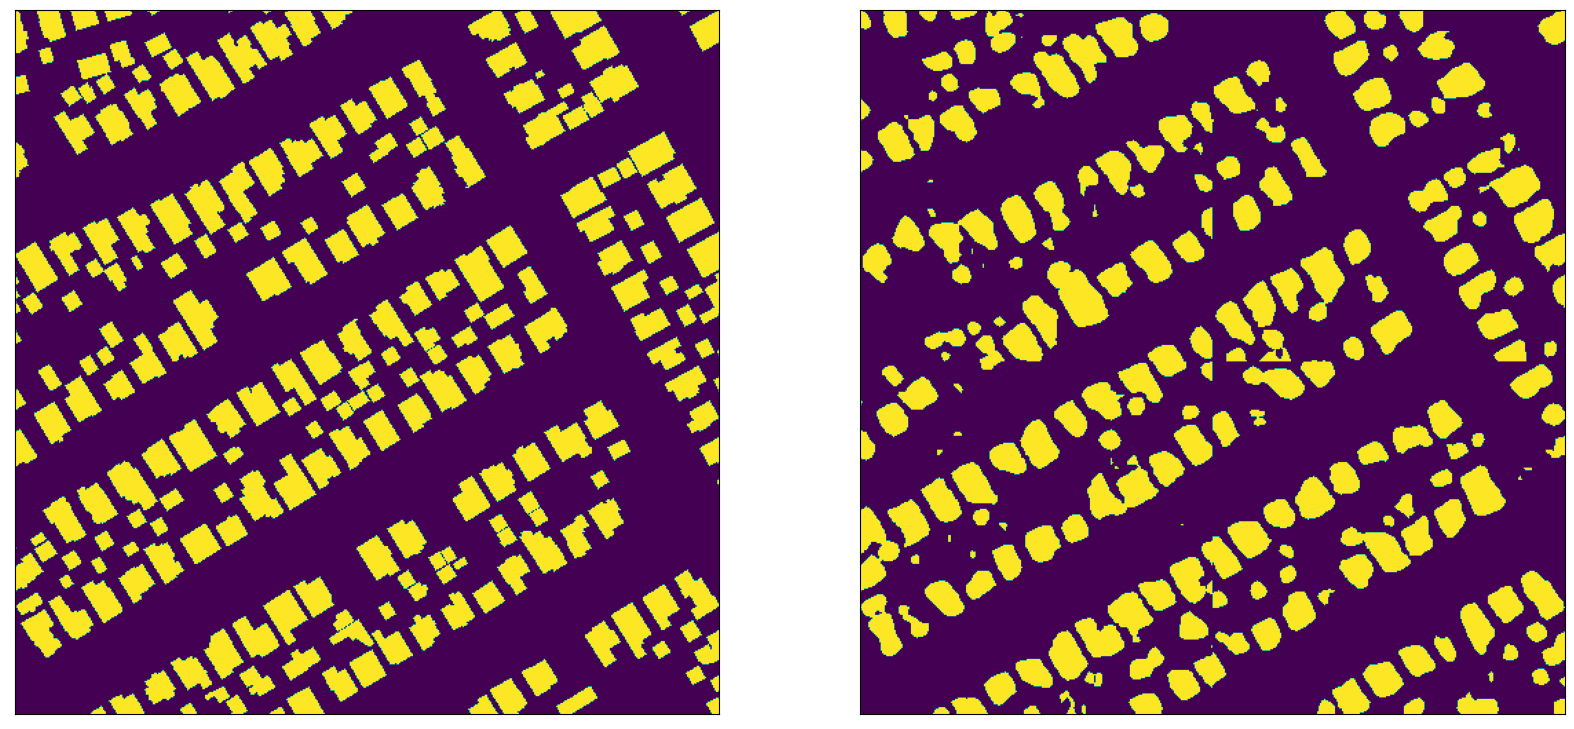

In [8]:
plot_sample(mask, two_pred)

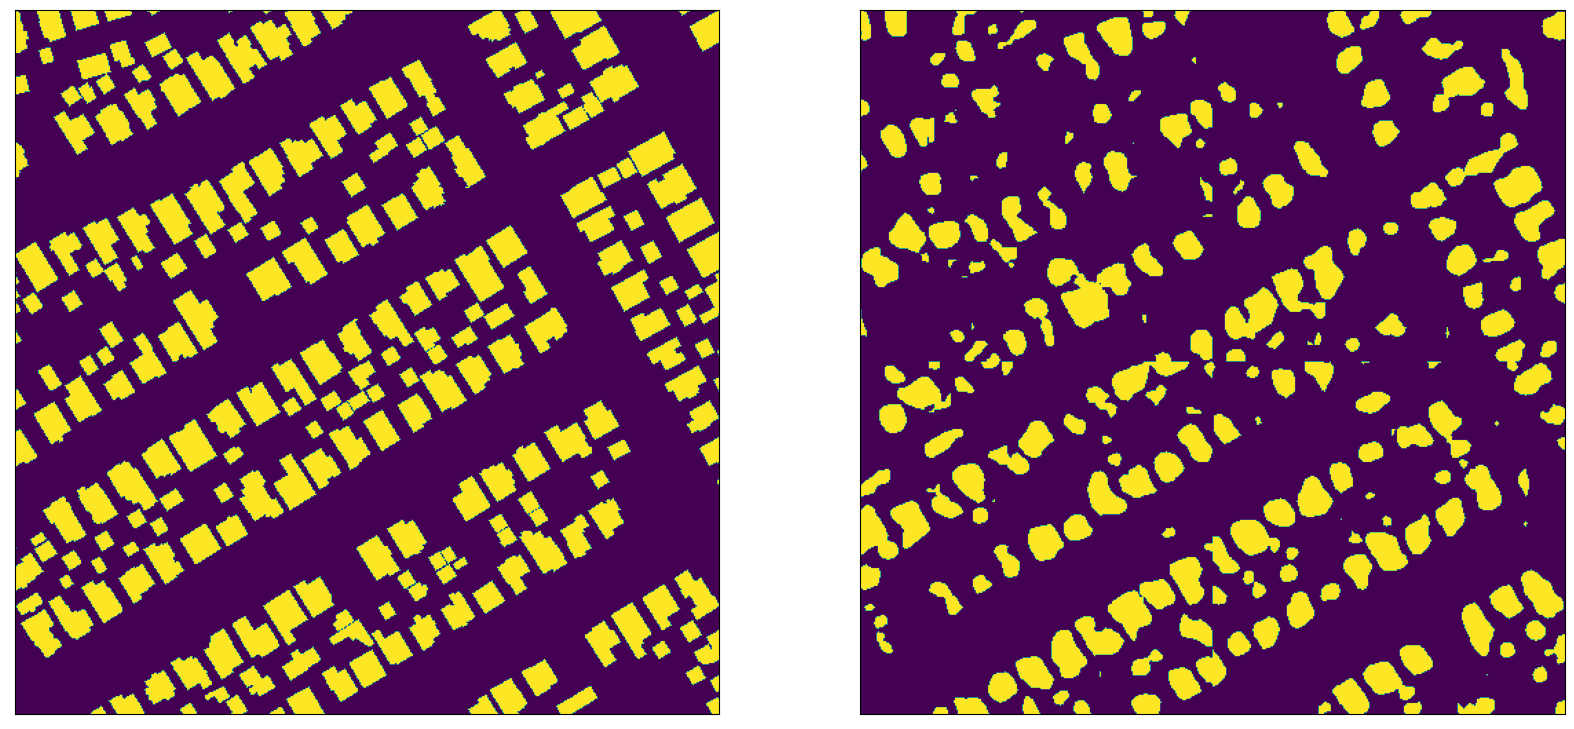

In [10]:
plot_sample(mask, two_pred_la)